<a href="https://colab.research.google.com/github/z-arabi/SRU-deeplearning-workshop/blob/master/04_a_Gentle_Introduction_to_Keras_Simple_neural_network(mlp).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
! git clone https://github.com/z-arabi/SRU-deeplearning-workshop
%cd SRU-deeplearning-workshop

Cloning into 'SRU-deeplearning-workshop'...
remote: Enumerating objects: 155, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 155 (delta 28), reused 35 (delta 11), pack-reused 89
Receiving objects: 100% (155/155), 14.51 MiB | 15.61 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/SRU-deeplearning-workshop/SRU-deeplearning-workshop


## Dataset


```
# for more information read "19-Intro2ML-HodaDataset.ipynb"
import cv2
import numpy as np
from scipy import io

def load_hoda(training_sample_size=1000, test_sample_size=200, size=5):
    #load dataset
    trs = training_sample_size
    tes = test_sample_size
    dataset = io.loadmat('./dataset/Data_hoda_full.mat')

    #test and training set
    X_train_orginal = np.squeeze(dataset['Data'][:trs])
    y_train = np.squeeze(dataset['labels'][:trs])
    X_test_original = np.squeeze(dataset['Data'][trs:trs+tes])
    y_test = np.squeeze(dataset['labels'][trs:trs+tes])

    #resize
    X_train_5by5 = [cv2.resize(img, dsize=(size, size)) for img in X_train_orginal]
    X_test_5by_5 = [cv2.resize(img, dsize=(size, size)) for img in X_test_original]
    #reshape
    X_train = np.reshape(X_train_5by5, [-1,size**2])
    X_test = np.reshape(X_test_5by_5, [-1,size**2])

    return X_train, y_train, X_test, y_test
```



In [25]:
# tensorflow v2.x > support NVIDIA
import keras
from keras.models import Sequential
from keras.layers import Dense,  Activation
import numpy as np

from dataset import load_hoda

In [26]:
np.random.seed(123)  # for reproducibility

In [27]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()


In [28]:
'''
in keras the input must obey some rules:
1. input must be np array not list
2. accepts float32 bit not int 
3. all the inputs are better to be normalized
4. labels must be one hotted
'''

'\nin keras the input must obey some rules:\n1. input must be np array not list\n2. accepts float32 bit not int \n3. all the inputs are better to be normalized\n4. labels must be one hotted\n'

In [29]:
x_train_original.shape, y_train_original.shape

((1000, 25), (1000,))

In [30]:
# for one hotted the numbers
# for one hot the strings we use the sklearn > one_hot = pd.get_dummies(df, columns = ['xxx'])
keras.utils.to_categorical(y_train_original, num_classes=10)[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [31]:
keras.utils.to_categorical(y_train_original, num_classes=10).shape

(1000, 10)

In [32]:
def print_data_info(x_train, y_train, x_test, y_test):
    #Check data Type
    print ("\ttype(x_train): {}".format(type(x_train)))
    print ("\ttype(y_train): {}".format(type(y_train)))

    #check data Shape
    print ("\tx_train.shape: {}".format(np.shape(x_train)))
    print ("\ty_train.shape: {}".format(np.shape(y_train)))
    print ("\tx_test.shape: {}".format(np.shape(x_test)))
    print ("\ty_test.shape: {}".format(np.shape(y_test)))

    #sample data
    print ("\ty_train[0]: {}".format(y_train[0]))

In [33]:
# Preprocess input data for Keras. 

# the np.array make it mutable
x_train = np.array(x_train_original)
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
x_test = np.array(x_test_original)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

In [34]:
print("Before Preprocessing:")
print_data_info(x_train_original, y_train_original, x_test_original, y_test_original)
print("After Preprocessing:")
print_data_info(x_train, y_train, x_test, y_test)

Before Preprocessing:
	type(x_train): <class 'numpy.ndarray'>
	type(y_train): <class 'numpy.ndarray'>
	x_train.shape: (1000, 25)
	y_train.shape: (1000,)
	x_test.shape: (200, 25)
	y_test.shape: (200,)
	y_train[0]: 6
After Preprocessing:
	type(x_train): <class 'numpy.ndarray'>
	type(y_train): <class 'numpy.ndarray'>
	x_train.shape: (1000, 25)
	y_train.shape: (1000, 10)
	x_test.shape: (200, 25)
	y_test.shape: (200, 10)
	y_train[0]: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [35]:
x_train.dtype, x_train.min(), x_train.max()

(dtype('uint8'), 0, 255)

In [36]:
# for normalization it must be float > we have divisions
# 0-255 >> 0-1 >> /255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [37]:
x_train.min(), x_train.max(), x_train.mean(), x_train.std()

(0.0, 1.0, 0.40205175, 0.45745108)

## Model Architecture

In [38]:
model = Sequential()
# relu is good for hidden layers 
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(10, activation='softmax'))

In [39]:
model.summary()
# 1664 = 25*64 + 1*64(bias) 
# 650 = 64*10 + 1*10

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                1664      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 2,314
Trainable params: 2,314
Non-trainable params: 0
_________________________________________________________________


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Compile model</div>


In [40]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [41]:
# 3 main splits > train, validation, test
# calculate the loss and acc on val data
# the weights are updated based on the train dataset
model.fit(x_train, y_train,
          epochs=30,
          batch_size=64, validation_split=0.2)

Epoch 1/30
13/13 [==============================] - 1s 18ms/step - loss: 2.1996 - accuracy: 0.2075 - val_loss: 2.0966 - val_accuracy: 0.3100
Epoch 2/30
13/13 [==============================] - 0s 4ms/step - loss: 2.0111 - accuracy: 0.3762 - val_loss: 1.9353 - val_accuracy: 0.4750
Epoch 3/30
13/13 [==============================] - 0s 4ms/step - loss: 1.8560 - accuracy: 0.5088 - val_loss: 1.7750 - val_accuracy: 0.5850
Epoch 4/30
13/13 [==============================] - 0s 5ms/step - loss: 1.7033 - accuracy: 0.6263 - val_loss: 1.6226 - val_accuracy: 0.6450
Epoch 5/30
13/13 [==============================] - 0s 5ms/step - loss: 1.5532 - accuracy: 0.7125 - val_loss: 1.4786 - val_accuracy: 0.7300
Epoch 6/30
13/13 [==============================] - 0s 7ms/step - loss: 1.4093 - accuracy: 0.7650 - val_loss: 1.3494 - val_accuracy: 0.7500
Epoch 7/30
13/13 [==============================] - 0s 8ms/step - loss: 1.2742 - accuracy: 0.8125 - val_loss: 1.2246 - val_accuracy: 0.7800
Epoch 8/30
13/13 [=

## Model Evaluation

In [42]:
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

7/7 [==============================] - 0s 3ms/step - loss: 0.3537 - accuracy: 0.9100

Testing loss: 0.35, acc: 0.91%


## Predicting


In [43]:
predicted = model.predict(x_test)
predicted

7/7 [==============================] - 0s 2ms/step


array([[7.1471832e-03, 7.7642227e-04, 2.7973335e-03, ..., 9.7094637e-01,
        8.6698390e-05, 3.5177168e-04],
       [4.1980422e-04, 3.4119360e-04, 6.2286496e-01, ..., 1.2436294e-02,
        1.7137306e-04, 5.6473833e-05],
       [6.3755671e-03, 4.5660735e-04, 1.8060283e-01, ..., 3.1021552e-02,
        7.4766536e-04, 1.9191684e-03],
       ...,
       [1.6911966e-01, 8.3400086e-03, 1.1108893e-02, ..., 5.6191634e-02,
        2.1859718e-02, 7.9185329e-02],
       [6.3724779e-05, 9.4002802e-03, 4.2026443e-04, ..., 8.8448796e-05,
        2.0752314e-03, 8.2014245e-01],
       [8.4769150e-04, 1.8237062e-05, 1.9086897e-06, ..., 3.6682017e-05,
        4.2898281e-04, 1.0437677e-05]], dtype=float32)

In [47]:
print(predicted.shape)
predicted_classes=np.argmax(predicted,axis=1)
print(predicted_classes.shape)

(200, 10)
(200,)


In [48]:
print("predicted:")
print(predicted_classes)
print("True Label:")
print(y_test_original)

predicted:
[7 2 3 9 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 7 5 5 8 9 2 5
 1 4 8 8 4 7 2 1 2 7 9 0 3 7 5 7 5 2 9 8 2 9 8 8 6 6 6 7 6 2 4 2 4 4 5 9 1
 8 4 0 5 6 2 4 3 2 7 7 7 7 1 8 1 7 8 7 7 8 9 6 2 3 1 0 2 9 6 3 5 5 0 0 9 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 9 5 2 9 0 3 1 8 2 2 3 5 2 9 3 8 2
 7 0 9 9 0 7 6 2 4 4 9 3 7 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 3 5 7 4 1 3 3 1
 1 4 3 8 9 6 7 7 2 3 0 1 4 9 5]
True Label:
[7 2 3 1 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 7 5 5 8 9 6 5
 1 4 8 8 4 7 7 1 2 7 9 0 3 7 4 7 5 2 9 8 2 9 8 8 6 6 6 6 6 2 4 3 4 4 5 9 1
 8 2 0 5 6 2 4 3 2 7 7 7 7 1 8 1 7 8 7 7 8 9 3 2 3 1 0 2 9 6 3 5 5 0 0 3 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 6 5 2 9 0 4 1 8 2 2 3 0 2 9 3 8 6
 7 0 9 9 0 7 6 5 4 7 9 3 7 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 7 4 1 3 3 1
 2 3 3 8 9 6 7 7 2 3 0 1 4 9 5]


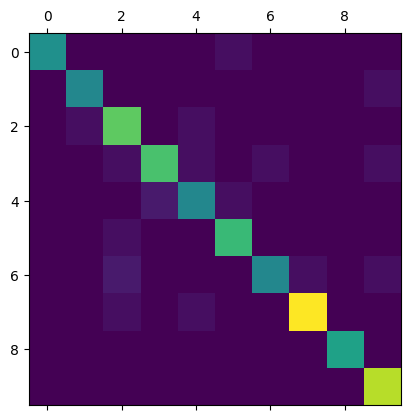

In [55]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_original, predicted_classes)

# plt.matshow(cm) / plt.imshow(cm)
plt.matshow(cm)

<Axes: >

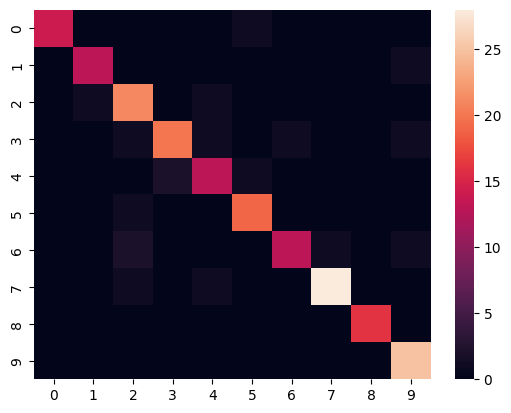

In [56]:
# matplotlib doesn't have heatmap and instead it has imshow
! pip install --quiet seaborn
import seaborn as sns

sns.heatmap(cm)

<Axes: >

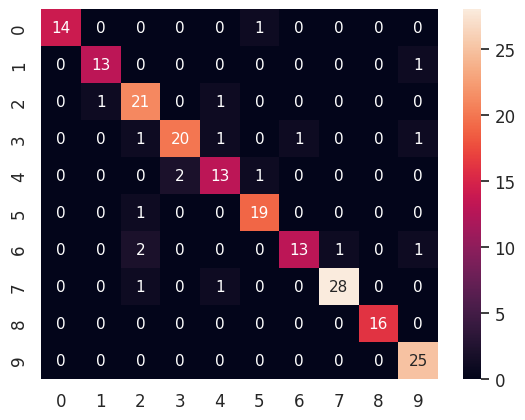

In [59]:
sns.set(font_scale=1.1) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 11}) # font size

## Complete Code

In [ ]:
# 1. Import libraries and modules
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from dataset import load_hoda

np.random.seed(123)  # for reproducibility

# 2. Load pre-shuffled HODA data into train and test sets
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

# 3. Preprocess input data
''' 3.1: input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

# 5. Define model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(10, activation='softmax'))

# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# 7. Fit model on training data
model.fit(x_train, y_train,
          epochs=30,
          batch_size=64)

# 8. Evaluate model on test data
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))